<a href="https://colab.research.google.com/github/Vaaya1176/Shivaaya_Projects/blob/main/IMDB_Review_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import os
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Loading the dataset
DATASET_FILE = "/IMDB Dataset.csv"
try:
    data = pd.read_csv(DATASET_FILE, encoding="utf-8")
except UnicodeDecodeError:
    data = pd.read_csv(DATASET_FILE, encoding="latin-1")
except Exception as e:
    raise RuntimeError(f"Error loading dataset: {e}")

print("Dataset loaded successfully.")

# Handling the missing values
data.dropna(inplace=True)
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

# Spliting the data into training and testing data
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Tokenizing
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"].astype(str))
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"].astype(str)), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"].astype(str)), maxlen=200)

Y_train = train_data["sentiment"].fillna(0).astype(int)
Y_test = test_data["sentiment"].fillna(0).astype(int)

# Creating a sequential model
model = Sequential()
model.add(Input(shape=(200,)))
model.add(Embedding(input_dim=5000, output_dim=128))
model.add(LSTM(64))
model.add(Dense(1, activation="sigmoid"))

# Compiling the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

# Training the model
model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluating the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predicting
Y_pred_probs = model.predict(X_test)
Y_pred = (Y_pred_probs > 0.5).astype(int)

# Calculating the evaluation metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred_probs)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

def predict_sentiment(review):
    sequence = tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(sequence, maxlen=200)
    prediction = model.predict(padded_sequence)
    sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
    return sentiment

# Example usage
new_review = "This movie was fantastic. I loved it."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")


Dataset loaded successfully.


<ipython-input-19-b35be4988297>:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 200, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 689,473 (2.63 MB)

 Trainable params: 689,473 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 134s 260ms/step - accuracy: 0.7497 - loss: 0.4922 - val_accuracy: 0.8744 - val_loss: 0.2969
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 144s 265ms/step - accuracy: 0.8874 - loss: 0.2828 - val_accuracy: 0.8777 - val_loss: 0.3062
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 142s 266ms/step - accuracy: 0.9185 - loss: 0.2129 - val_accuracy: 0.8629 - val_loss: 0.3227
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 131s 262ms/step - accuracy: 0.9346 - loss: 0.1757 - val_accuracy: 0.8670 - val_loss: 0.3176
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 130s 261ms/step - accuracy: 0.9463 - loss: 0.1443 - val_accuracy: 0.8792 - val_loss: 0.3295
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8782 - loss: 0.3178
Test Loss: 0.3165528178215027
Test Accuracy: 0.8812999725341797
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step
Accuracy: 0.8813
Precision: 0.875438596491228
Recall: 0.891248263544354
F1 Score: 0.8832726915134231
ROC AUC Score: 0.9454126389049509
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

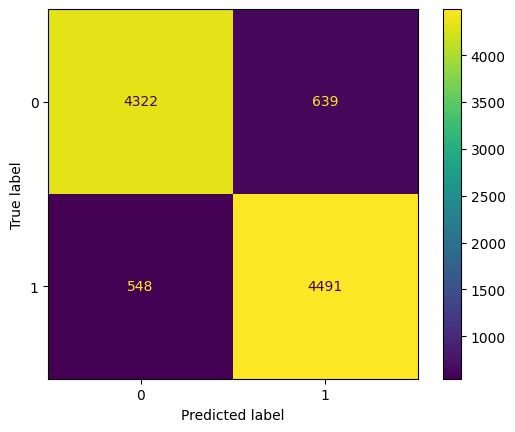

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Generating confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


